In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
data = pd.read_csv('UpdatedResumeDataSet.csv')
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [3]:
print(data['Category'].value_counts())

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

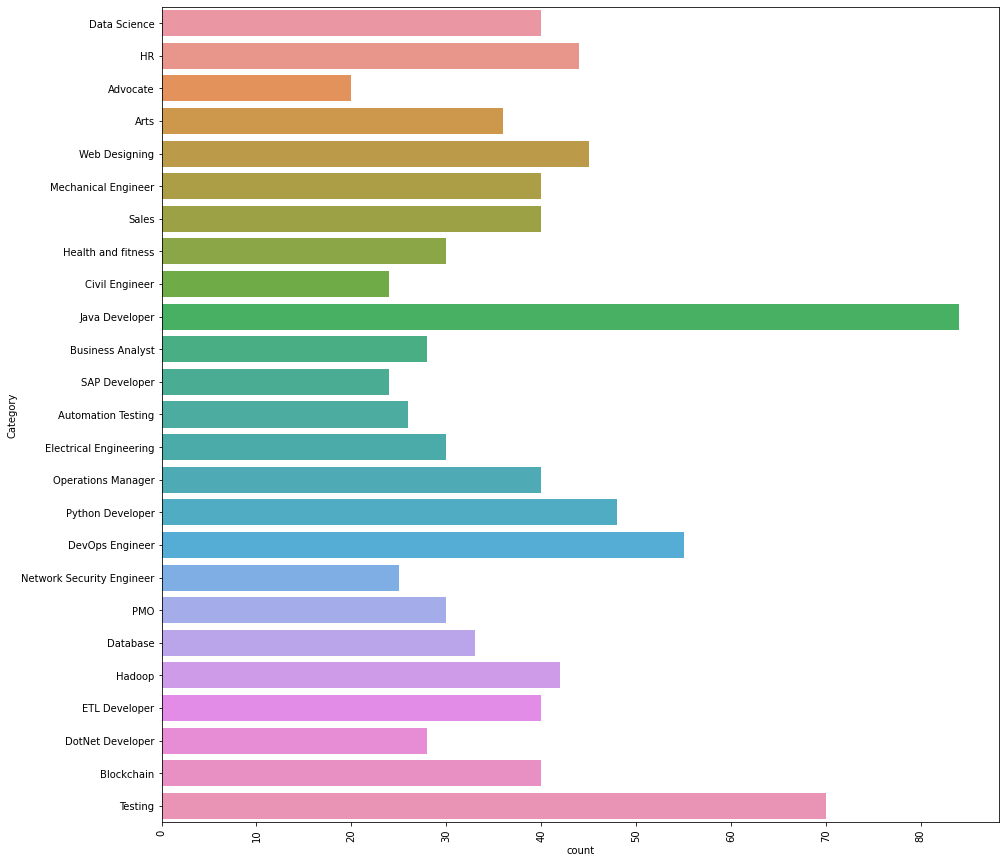

In [4]:
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation = 90)
sns.countplot(y="Category",data= data)


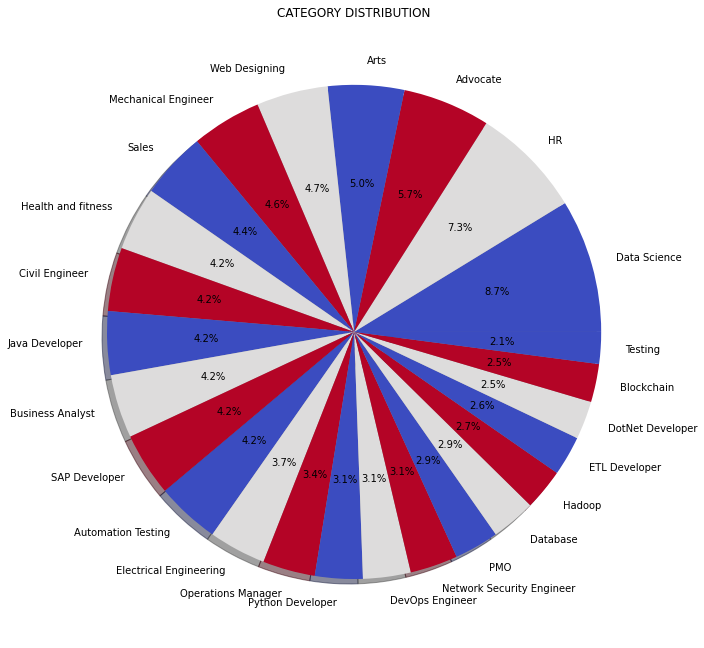

In [5]:
from matplotlib.gridspec import GridSpec
targetCounts = data['Category'].value_counts()
targetLabel = data['Category'].unique()

plt.figure(1,figsize=(25,25))
the_grid = GridSpec(2,2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0,1,3)]
plt.subplot(the_grid[0,1], aspect = 1, title = 'CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels = targetLabel, autopct = '%1.1f%%', shadow = True, colors=colors)

In [6]:
import re 

def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
data['cleaned_resume'] = data.Resume.apply(lambda x: cleanResume(x))

In [7]:
data

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


In [8]:
# Now we have clean data and Task is to have a look at word count.
# A word count represent the most number of words larger

In [9]:
!pip install nltk

In [11]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [26]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /home/ai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ai/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


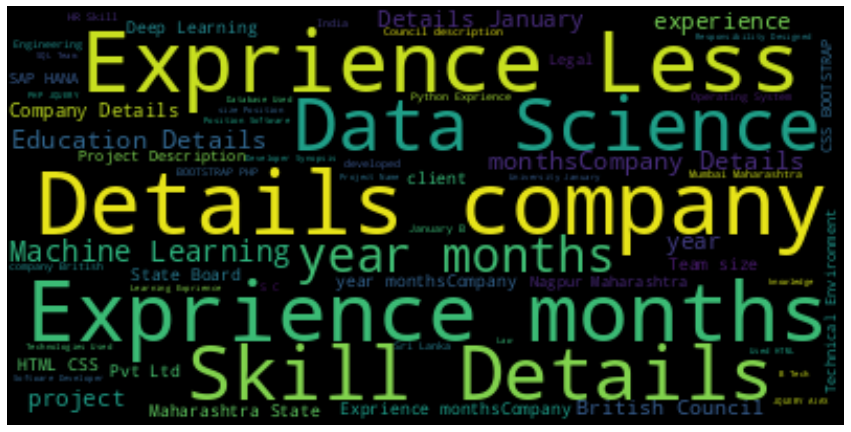

In [34]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
Sentences = data['Resume'].values

cleanedSentences = ""

for i in range (0,160):
    cleanedText = cleanResume(Sentences[i])
#     print(cleanedText)
    cleanedSentences +=cleanedText
#     print("+++++++++++++++++++++++++++++++++++++++++++",cleanedSentences)
#     break
    requiredWords = nltk.word_tokenize(cleanedText)
    
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
            
wordfreqlist  = nltk.FreqDist(totalWords)
mostcommon = wordfreqlist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize = (15,15))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()



In [37]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /mnt/d/Data_scientist/FunZone/virtual_environments/python_3.8/lib/python3.8/site-packages (1.0.2)


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
var_mod = ['Category']

In [40]:
le = LabelEncoder()

In [42]:
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
from scipy.sparse import hstack

In [46]:
requiredText = data['cleaned_resume'].values

In [47]:
requiredTarget = data['Category'].values

In [48]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [49]:
print ("Feature completed .....")

Feature completed .....


In [50]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(769, 1500)
(193, 1500)


In [51]:
clf = OneVsRestClassifier(KNeighborsClassifier())


NameError: name 'OneVsRestClassifier' is not defined